In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
bankdata=pd.read_csv('Bank.csv')

In [9]:
bankdata.shape

(5000, 14)

In [10]:
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#   

# 2. Distribution of the various Attributes

In [11]:
columns=list(bankdata.drop(['ID','ZIP Code','Personal Loan'],axis=1))

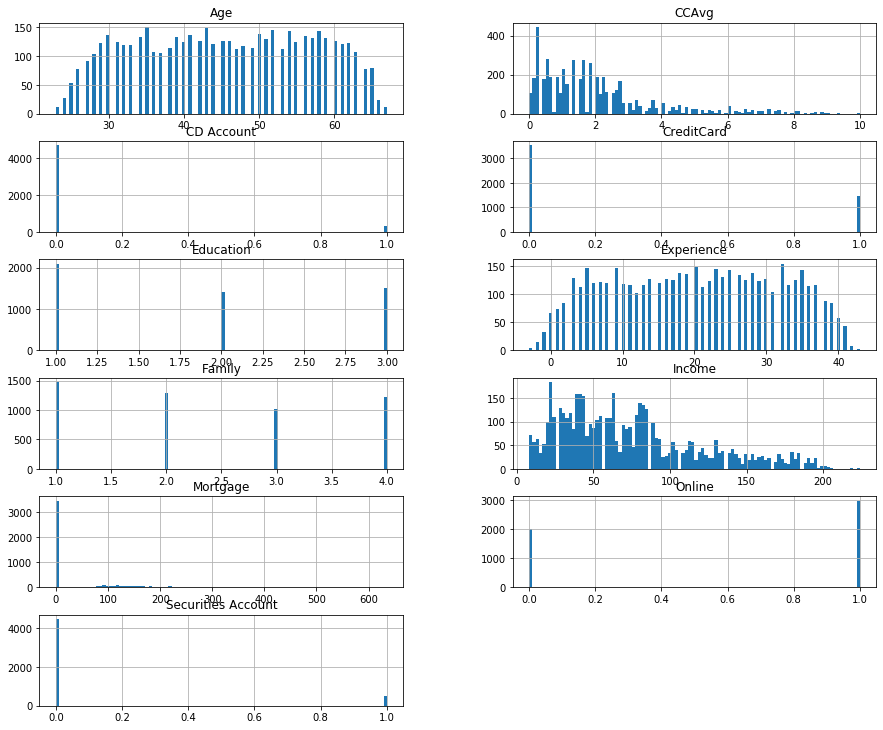

In [15]:
bankdata[columns].hist(stacked=False, bins=100, figsize=(15,30), layout=(14,2)); 

 # Findings from the distribution of the various attributes

### Age : 
#### The Customers seem to be normally distributed across ages above ten to a little above 80 years old.

### Average spending on credit cards per month (CCAvg): 
#### Generally more customers seem to spend less on their credit cards per month

### Certificate of Deposit Account (CD Account) : 
#### It appears that most of the customers do not have a certificate of deposit account, over 4000 of them. Perharps the bank should give attention to that

### Credit Card (CC) :  
#### it's obvious that most of the customers i.e about 3,500 of them don't see the need for a credit card issued by Universal Bank 

### Education:  
#### Most of the customers are undergraduates (over 2000) totalling to about a half of the number in this consideration

### Experience: 
#### The distribution of years of experience for the customers is averagely normal

### Family size: 
#### The distribution reveals that people with the family size of 1 seem to form a considerable number of the overall customers of Thera Bank

### Income:
#### The distribution of the income of the customers is skewed to the right. This also reveals that the most of the customers earn between Twenty to Eighty thousand dollars annually

### Mortgage:
#### Just a little (near zero) of the customers have any value of mortgage


### Online:
#### More than half of the customers use internet banking facilities

### Securities account:
#### The bulk of the customers do not own security bank accounts with the bank (about 4,800 customers don't have securities account with the bank).

###     

# 3. Distribution of the Target Column

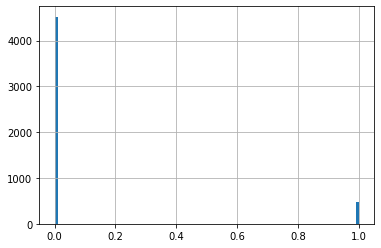

In [20]:
bankdata['Personal Loan'].hist(stacked=False, bins=100); 

### From the distribution above, it  is obvious that only a few Hundreds of the customers said yes or agreed to a personal loan, if this is a critical measure for progress, then the Bank must have to adjust some variables in order to see desired changes

#    

#  Logistic Regression

In [42]:
# remove unnecesary columns from the entire dataset, particularly  ID and ZIPCODE
newbankdata=bankdata.drop(['ID','ZIP Code'],axis=1)
newbankdata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## 4. Split Data into Training and Test sets respectively

In [46]:
from sklearn.model_selection import train_test_split

X= newbankdata.drop('Personal Loan', axis=1) ## Independent Variables
Y= newbankdata['Personal Loan']   ## Outcome or Dependent Varible



## Split the data into training and testing sets, 80% for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

#  

## 5. Model Building

In [53]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)


          0        1         2        3         4         5         6  \
0 -0.406354  0.40496  0.049147  0.65168  0.162405  1.655912  0.000795   

          7         8         9        10  intercept  
0 -0.907378  3.263023 -0.576035 -1.006453  -2.377415  


#  

## Model Score

In [54]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9453333333333334


# 6. Confusion Matrix

In [64]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])


In [82]:

## Convert the confusion matrix to a dataframe
def cm2df(cm, labels):
    df = pd.DataFrame()
    # rows
    for i, row_label in enumerate(labels):
        rowdata={}
        # columns
        for j, col_label in enumerate(labels): 
            rowdata[col_label]=cm[i,j]
        df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
    return df[labels]
confuse_m=cm2df(cm,["1","0"])
## Print out the confusion Matrix
confuse_m

,1,0
1,85,64
0,18,1333


#    

# 7.  My Reasoning on How the model can perform better

## The Model can be made to perform better if the dataset is increased and outliers are striked out of the dataset